# Define the parameters

In [5]:
include("../src/Simulation.jl")

# parameters of the simulation
mass = 1000
graph_type = "line"
N_reactors = 1
forward_rate = 1.0e-2   # f_rate_list = [0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
outflow_rate = 5.0      # o_rate_list = [5.0, 10.0, 50.0, 100.0]
backword_rate = 1.0
total_time = 100.0
sim_number = 1
notes = "First milestone: time series"

# instantiate
sim = Simulation(mass, graph_type, N_reactors, forward_rate, outflow_rate, backword_rate, total_time, 
                    sim_number = sim_number, notes = notes)

Simulation(100.0, 1.0, -1, 5053161209, "line", 1, 1, 1000, [1.0e-5 1.0 5.0], Dict(-1 => (-1,)), [:complete_timeseries], Dict{Any, Any}(), 1, "/Users/alexandre/Documents/academic/2-research/projects/2023 spatial-topology/flow-complexity/data/sims/1", "First milestone: time series", Ensemble([1], Chemostat[Chemostat(1, [0.01, 1.0, 5.0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 1000, 1000, Int64[], Float64[], Int64[])], SimpleDiGraph{Int64}(0, [Int64[]], [Int64[]]), [1]))

In [35]:
typeof(sim)

Simulation

# Run the simulation

In [28]:
# run
RunSimulation(sim) # takes about 2m22sec

Sim Completed
Data Saved


# Read the time series and format the data

In [29]:
using CSV
using DataFrames

fn = "/Users/alexandre/Documents/academic/2-research/projects/2023 spatial-topology/flow-complexity/data/sims/1/timeseries.csv"

df = CSV.read(fn, DataFrame)
sort!(df, :time);

# Plot the data

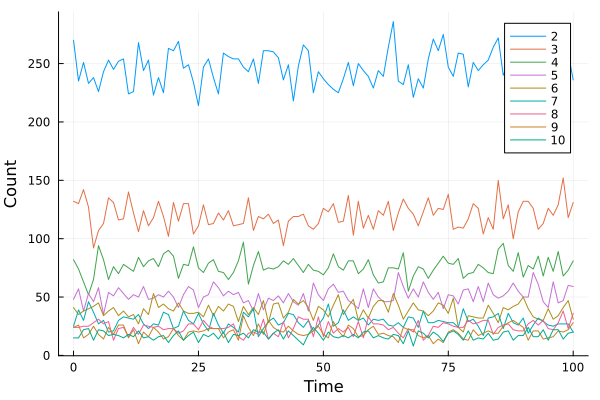

In [32]:
using Plots

p = plot(xlabel="Time", ylabel="Count")

for i in 2:10

    filtered_df = filter(row -> row[:variable] == i, df)
    plot!(p, filtered_df.time, filtered_df.value, label="$i")

end

display(p)